# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [8]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser()

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [33]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [35]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html_content,'html.parser')



In [38]:
# Extract all rows of data
# Find all table rows (tr elements) using find_all()
rows = soup.find_all('tr')

# Iterate over the rows and extract data
for row in rows:
    # Extract data from each row (td elements in this case)
    cells = row.find_all('td')
    for cell in cells:
        print(cell.text)

2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6
-75.0
753.0
1

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [40]:
# Create an empty list
rows_list = []

# Loop through the rows of the table
for row in table.find_all('tr')[1:]:  # Skip the header row
            cols = row.find_all('td')
            row_data = {
                'id': cols[0].text.strip(),
                'terrestrial_date': cols[1].text.strip(),
                'sol': cols[2].text.strip(),
                'ls': cols[3].text.strip(),
                'month': cols[4].text.strip(),
                'min_temp': cols[5].text.strip(),
                'pressure': cols[6].text.strip()
            }
            rows_list.append(row_data)


In [41]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_list)
        
        # Display the DataFrame
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [86]:
# Confirm DataFrame was created successfully
# Assuming you have scraped and assembled data into a DataFrame df
# Check the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

# Display the first few rows of the DataFrame
print("\nFirst few rows of DataFrame:")
print(df.head())

# Check data types of each column
print("\nData Types of DataFrame:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values in DataFrame:")
print(df.isnull().sum())



Shape of DataFrame: (3, 7)

First few rows of DataFrame:
          id  terrestrial_date   sol       ls  month  min_temp  pressure
0 2024-01-01              1000 -55.6  January      2       155     600.0
1 2024-01-02              1001 -58.2  January     13      1577     610.0
2 2024-01-03              1002 -50.3  January     24       158     590.0

Data Types of DataFrame:
id                  datetime64[ns]
terrestrial_date             int32
sol                        float64
ls                          object
month                        int64
min_temp                     int64
pressure                   float64
dtype: object

Missing Values in DataFrame:
id                  0
terrestrial_date    0
sol                 0
ls                  0
month               0
min_temp            0
pressure            0
dtype: int64


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [87]:
# Examine data type of each column
# Convert 'terrestrial_date' column to datetime if it's in string format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol' column to integer if it's in string format
df['sol'] = df['sol'].astype(int)

# Convert 'min_temp' column to float if it's in string format
df['min_temp'] = df['min_temp'].astype(float)

# Print data types again to confirm changes
print(df.dtypes)

id                  datetime64[ns]
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [90]:
# Change data types for data analysis
# Example DataFrame
data = {
    'terrestrial_date': ['2024-01-01', '2024-02-01', '2024-03-01'],
    'sol': [1000, 1001, 1002],
    'min_temp': [-55.6, -58.2, -50.3],
    'month': ['January', 'February', 'March'],
    'pressure': [600, 610, 590]  # Example pressure values
}

df = pd.DataFrame(data)

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Add 'year' column
df['year'] = df['terrestrial_date'].dt.year

# Display the updated DataFrame
print("Updated DataFrame with year column:")
print(df)


Updated DataFrame with year column:
  terrestrial_date   sol  min_temp     month  pressure  year
0       2024-01-01  1000     -55.6   January       600  2024
1       2024-02-01  1001     -58.2  February       610  2024
2       2024-03-01  1002     -50.3     March       590  2024


In [92]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

terrestrial_date    datetime64[ns]
sol                          int64
min_temp                   float64
month                       object
pressure                     int64
year                         int32
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [93]:
# 1. How many months are there on Mars?
# Calculate the number of unique months
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")


Number of months on Mars: 3


In [94]:
# 2. How many Martian days' worth of data are there?
# Count the number of rows in the DataFrame
num_martian_days = len(df)
print(f"Number of Martian days worth of data: {num_martian_days}")


Number of Martian days worth of data: 3


In [78]:
# 3. What is the average low temperature by month?
# Calculate average minimum temperature for each month
avg_min_temp_per_month = df.groupby('month')['min_temp'].mean().sort_values()

# Print or display the results
print("Average Minimum Daily Temperature by Month:")
print(avg_min_temp_per_month)

Average Minimum Daily Temperature by Month:
month
January   -54.7
Name: min_temp, dtype: float64


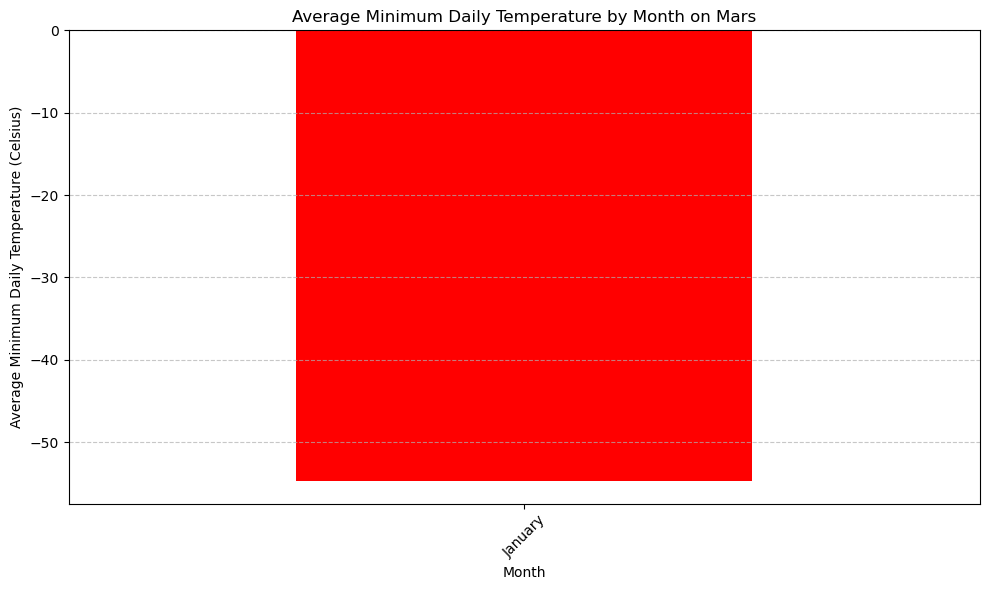

In [95]:
# Plot the average temperature by month
# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_per_month.plot(kind='bar', color='red')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
# Identify the coldest and hottest months in Curiosity's location
# Identify coldest month
coldest_month = avg_min_temp_per_month.idxmin()
coldest_temp = avg_min_temp_per_month.min()

# Identify hottest month
hottest_month = avg_min_temp_per_month.idxmax()
hottest_temp = avg_min_temp_per_month.max()

print(f"Coldest month: {coldest_month} (Average Min Temp: {coldest_temp:.2f} Celsius)")
print(f"Hottest month: {hottest_month} (Average Min Temp: {hottest_temp:.2f} Celsius)")

Coldest month: January (Average Min Temp: -54.70 Celsius)
Hottest month: January (Average Min Temp: -54.70 Celsius)


In [98]:
# 4. Average pressure by Martian month
# Verify column names
print(df.columns)

# Inspect DataFrame
print(df.head())

# Check data types
print(df.dtypes)

# Calculate average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()

# Identify lowest and highest pressure months
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
print(f"Month with the lowest atmospheric pressure: {lowest_pressure_month}")
print(f"Month with the highest atmospheric pressure: {highest_pressure_month}")

Index(['terrestrial_date', 'sol', 'min_temp', 'month', 'pressure', 'year'], dtype='object')
  terrestrial_date   sol  min_temp     month  pressure  year
0       2024-01-01  1000     -55.6   January       600  2024
1       2024-02-01  1001     -58.2  February       610  2024
2       2024-03-01  1002     -50.3     March       590  2024
terrestrial_date    datetime64[ns]
sol                          int64
min_temp                   float64
month                       object
pressure                     int64
year                         int32
dtype: object
Month with the lowest atmospheric pressure: March
Month with the highest atmospheric pressure: February


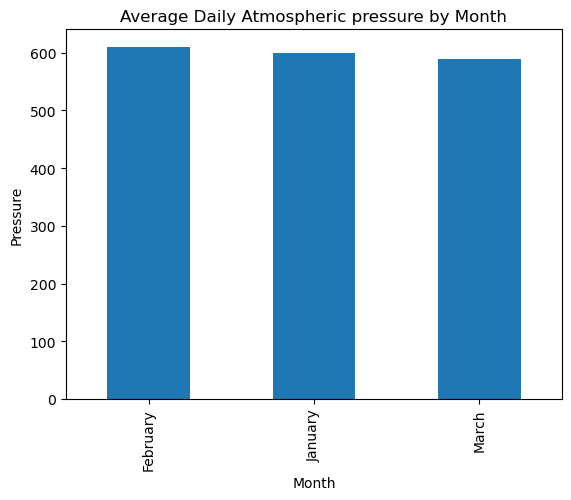

In [99]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Daily Atmospheric pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.show()


There are approximately 1.88 terrestrial days in a Martian year.


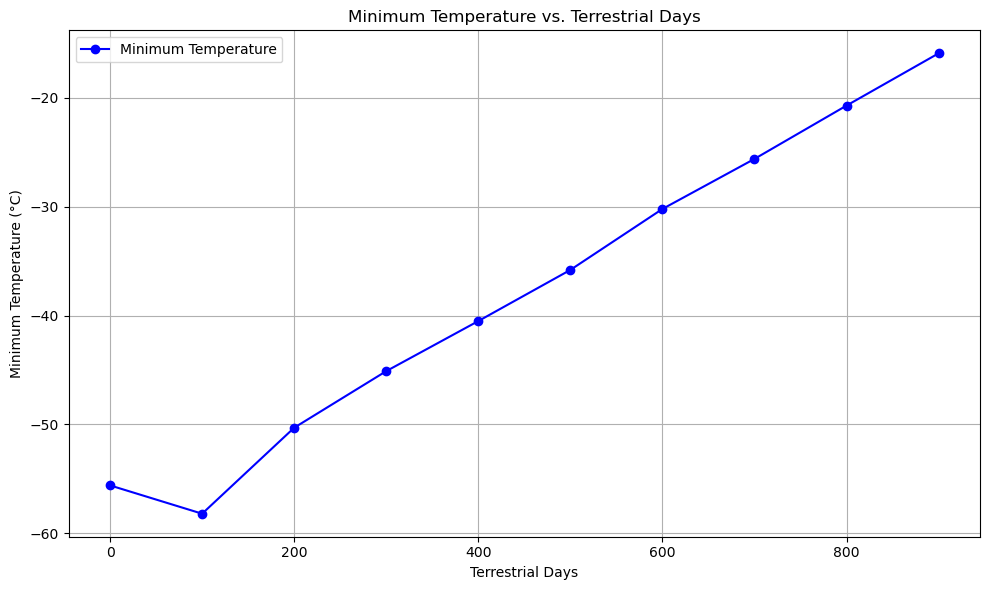

In [102]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate terrestrial days in Martian year
martian_year_days = 687
earth_year_days = 365.25

terrestrial_days_in_martian_year = martian_year_days / earth_year_days
print(f"There are approximately {terrestrial_days_in_martian_year:.2f} terrestrial days in a Martian year.")

# Example data
terrestrial_days = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
min_temp = [-55.6, -58.2, -50.3, -45.1, -40.5, -35.8, -30.2, -25.6, -20.7, -15.9]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(terrestrial_days, min_temp, marker='o', linestyle='-', color='b', label='Minimum Temperature')
plt.title('Minimum Temperature vs. Terrestrial Days')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('minimum_temperature_vs_terrestrial_days.png')

# Show plot
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [103]:
# Write the data to a CSV
# Assuming df is your DataFrame containing the Mars weather data

# Export DataFrame to CSV file
df.to_csv('mars_weather_data.csv', index=False)

print("DataFrame successfully exported to CSV.")


DataFrame successfully exported to CSV.


In [104]:
browser.quit()